In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
with zipfile.ZipFile('archive.zip', 'r') as file:
    file.extractall('')
    
df = pd.read_csv('song_data.csv')
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [3]:
df.isna().any()

song_name           False
song_popularity     False
song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
dtype: bool

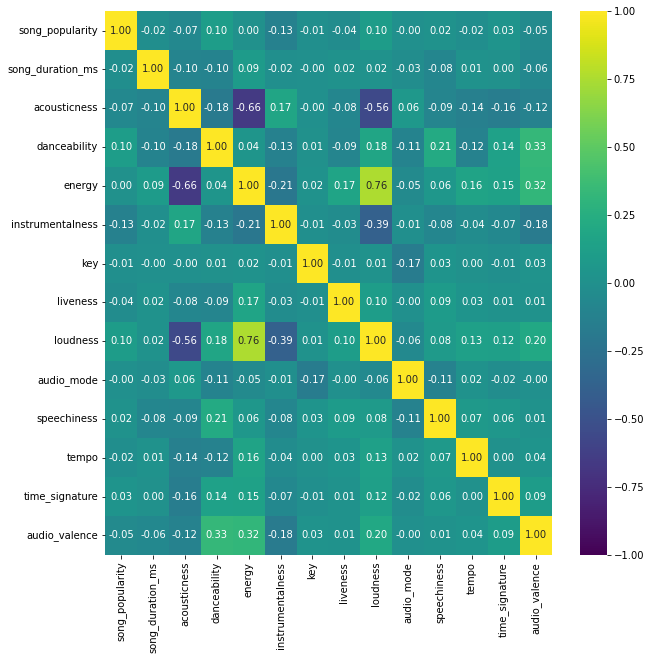

In [4]:
corr = df.corr()

fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(
    data = corr,
    annot = True,
    cmap = 'viridis',
    vmax = 1.0,
    vmin = -1.0,
    fmt = '.2f'
)

In [5]:
to_hist = df.drop(columns = ['song_name'])
to_hist.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

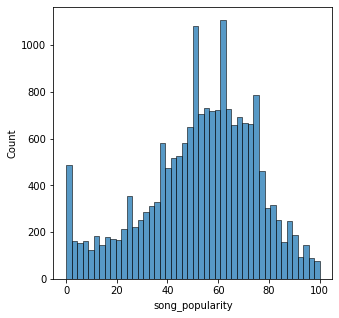

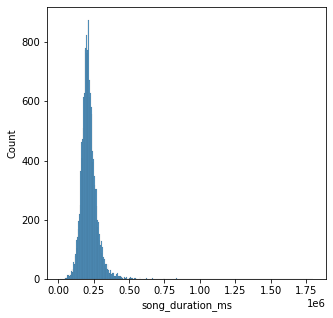

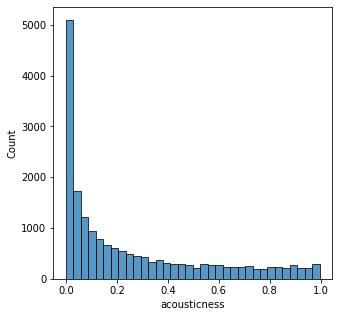

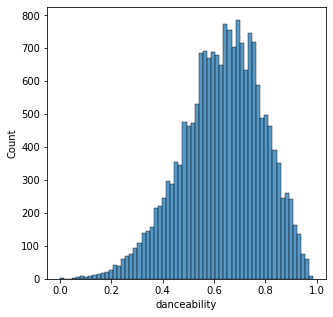

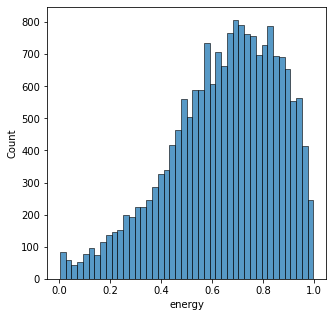

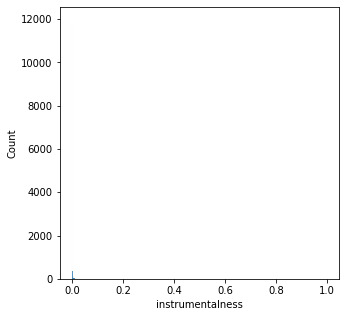

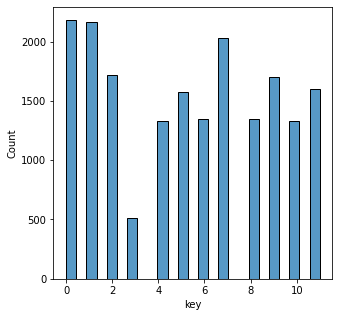

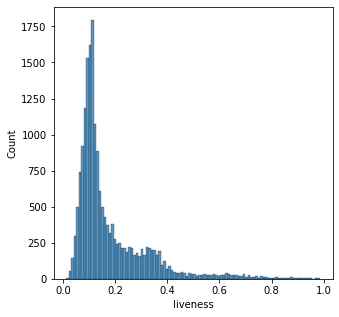

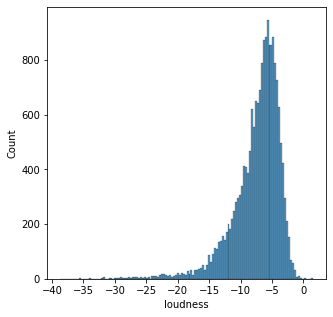

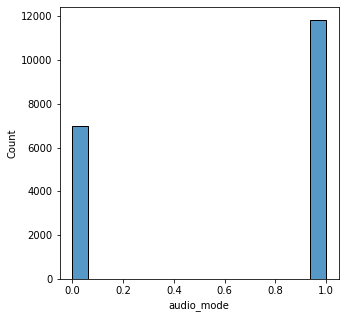

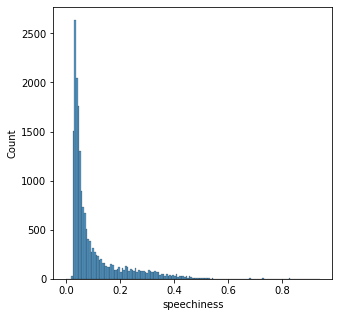

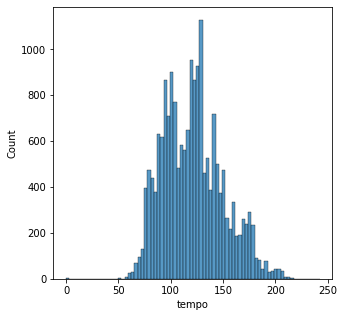

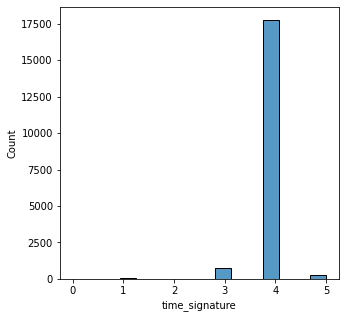

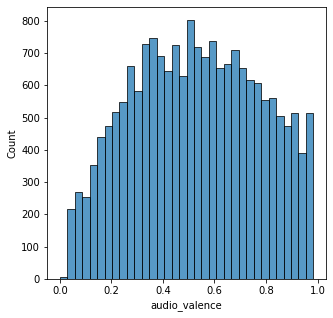

In [6]:
for i, col in enumerate(to_hist):
    plt.figure(i)
    fig, ax = plt.subplots(figsize = (5, 5))
    sns.histplot(
        data = to_hist,
        x = col
    )

In [7]:
df.drop(columns = ['song_name'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [8]:
df.describe().round(2)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00,18835.00
mean,52.99,218211.59,0.26,0.63,0.64,0.08,5.29,0.18,-7.45,0.63,0.10,121.07,3.96,0.53
std,21.91,59887.54,0.29,0.16,0.21,0.22,3.61,0.14,3.83,0.48,0.10,28.71,0.30,0.24
min,0.00,12000.00,0.00,0.00,0.00,0.00,0.00,0.01,-38.77,0.00,0.00,0.00,0.00,0.00
25%,40.00,184339.50,0.02,0.53,0.51,0.00,2.00,0.09,-9.04,0.00,0.04,98.37,4.00,0.34
50%,56.00,211306.00,0.13,0.64,0.67,0.00,5.00,0.12,-6.56,1.00,0.06,120.01,4.00,0.53
75%,69.00,242844.00,0.42,0.75,0.82,0.00,8.00,0.22,-4.91,1.00,0.12,139.93,4.00,0.72
max,100.00,1799346.00,1.00,0.99,1.00,1.00,11.00,0.99,1.58,1.00,0.94,242.32,5.00,0.98


In [9]:
df = df[(df['song_duration_ms'] < 414569.6599999999)]
df = df[(df['liveness'] < 0.466)]
df = df[(df['loudness'] > -21.972939999999998)]
df = df[(df['speechiness'] < 0.4579999999999999)]
df = df[(df['tempo'] > 10)& (df['tempo'] < 241)]
df.shape

(17362, 14)

In [10]:
df.drop(columns = ['key', 'audio_mode', 'time_signature'], inplace = True)

In [11]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
count,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000
mean,53.159601,215642.602177,0.253344,0.638353,0.647605,0.068851,0.155393,-7.262398,0.096504,121.178740,0.531556
std,21.993688,49312.669255,0.282229,0.153564,0.207154,0.205950,0.094700,3.347840,0.091999,28.381642,0.243917
min,0.000000,26186.000000,0.000001,0.059400,0.006980,0.000000,0.011900,-21.967000,0.022400,46.591000,0.023000
25%,40.000000,184732.000000,0.024400,0.540000,0.512000,0.000000,0.091400,-8.925750,0.037300,98.981250,0.338000
50%,56.000000,211160.000000,0.131000,0.649000,0.673000,0.000010,0.118000,-6.511500,0.054500,120.014000,0.531000
75%,69.000000,241611.500000,0.414000,0.751000,0.812000,0.002010,0.195000,-4.890000,0.115000,139.919750,0.730000
max,100.000000,414305.000000,0.996000,0.987000,0.999000,0.989000,0.465000,1.585000,0.457000,216.115000,0.984000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17362 entries, 0 to 18834
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   17362 non-null  int64  
 1   song_duration_ms  17362 non-null  int64  
 2   acousticness      17362 non-null  float64
 3   danceability      17362 non-null  float64
 4   energy            17362 non-null  float64
 5   instrumentalness  17362 non-null  float64
 6   liveness          17362 non-null  float64
 7   loudness          17362 non-null  float64
 8   speechiness       17362 non-null  float64
 9   tempo             17362 non-null  float64
 10  audio_valence     17362 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.6 MB


In [13]:
to_hist_2 = df
to_hist_2.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'audio_valence'],
      dtype='object')

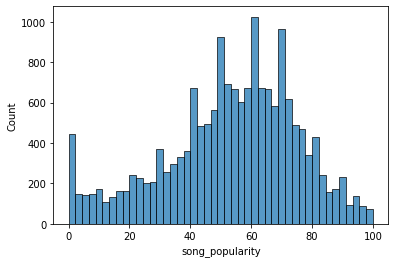

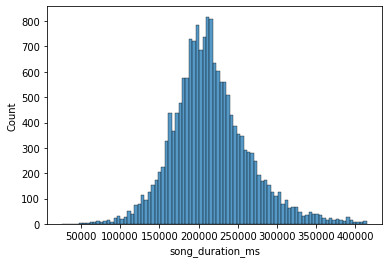

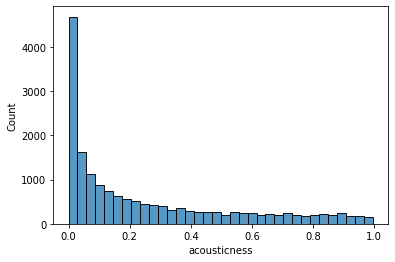

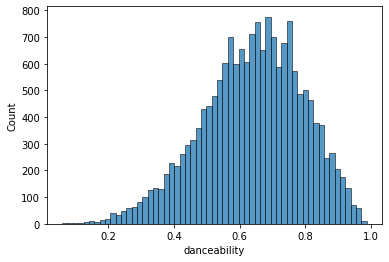

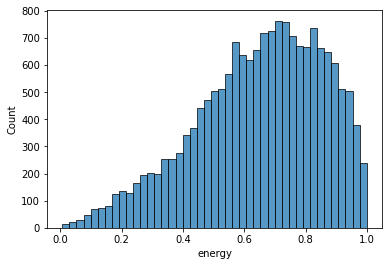

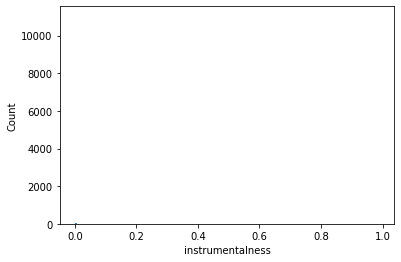

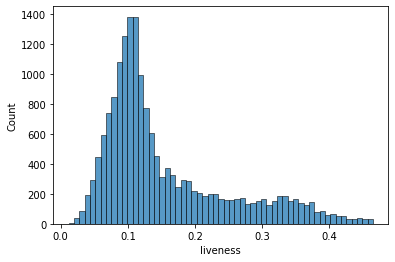

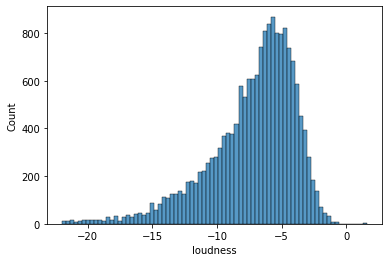

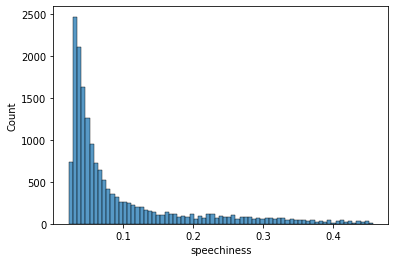

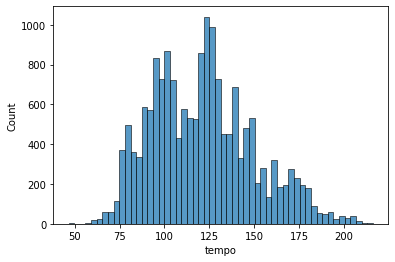

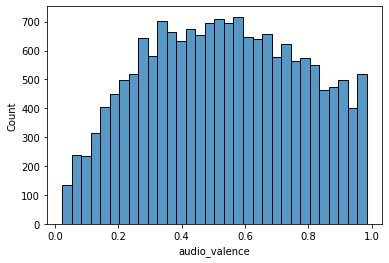

In [14]:
for i, col in enumerate(to_hist_2):
    plt.figure(i)
    sns.histplot(
        data = to_hist_2,
        x = col
    )

In [15]:
df['instrumentalness'].describe()

count    17362.000000
mean         0.068851
std          0.205950
min          0.000000
25%          0.000000
50%          0.000010
75%          0.002010
max          0.989000
Name: instrumentalness, dtype: float64

In [16]:
X = df.drop(columns = ['energy'])
y = df['energy']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state = 42
)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (13021, 10)
X_test shape: (4341, 10)
y_train shape: (13021,)
y_test shape: (4341,)


In [17]:
scaler = StandardScaler()

# X_std = scaler.fit_transform(X_train)
# y_std = scaler.fit_transform(y_train)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(f'Theta 0: {model.intercept_}')
print(f'Theta 1: {model.coef_}')

Theta 0: 0.9391963331746302
Theta 1: [-3.71063606e-04  2.07340597e-07 -2.54648038e-01 -2.28467073e-01
  8.55133214e-02  1.10568723e-01  3.47911497e-02  5.62322706e-02
  5.84184374e-05  2.08897021e-01]


In [19]:
pred = model.predict(X_train)

In [20]:
result_poly = smf.ols('energy ~ loudness +' + 'I(loudness ** 2)', data = pd.concat((([X_train, y_train])), axis = 1)).fit()
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     8409.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        21:12:23   Log-Likelihood:                 7450.8
No. Observations:               13021   AIC:                        -1.490e+04
Df Residuals:                   13018   BIC:                        -1.487e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0472      0.006  

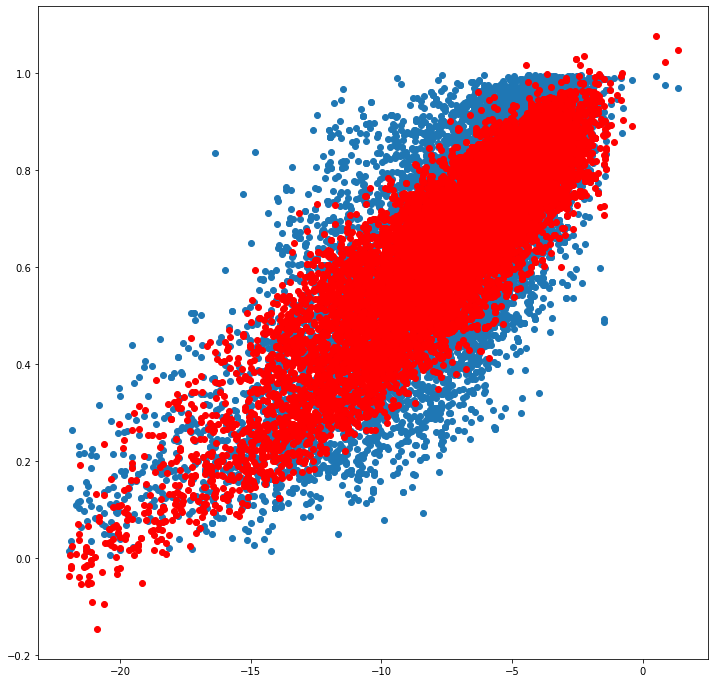

In [36]:
plt.subplots(figsize = (12, 12))
plt.scatter(X_train['loudness'], y_train)
plt.scatter(X_train['loudness'], pred, color = 'red')
plt.show()

In [22]:
from sklearn.metrics import r2_score

r2_score(y_train, pred)

0.7227503314810875

In [23]:
pred_test = model.predict(X_test) 

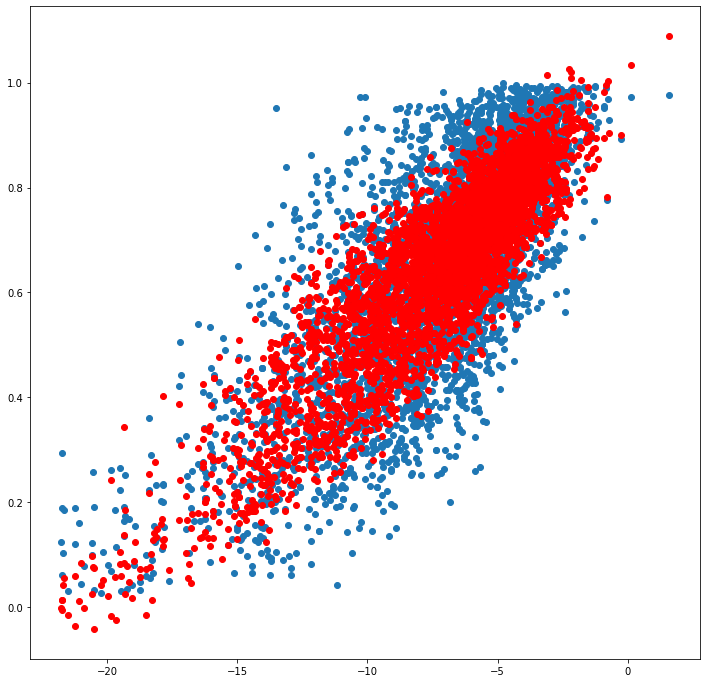

In [35]:
plt.subplots(figsize = (12, 12))
plt.scatter(X_test['loudness'], y_test)
plt.scatter(X_test['loudness'], pred_test, color = 'red')
plt.show()

In [25]:
r2_score(y_test, pred_test)

0.713319638672505